In [6]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [2]:
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', 
                                 index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', 
                                 index_col=0)

In [3]:
patient_affinities.shape, patient_mutations.shape

((7085, 1018), (7085, 1018))

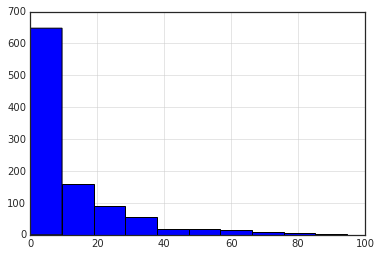

In [4]:
patient_affinities.min().hist()

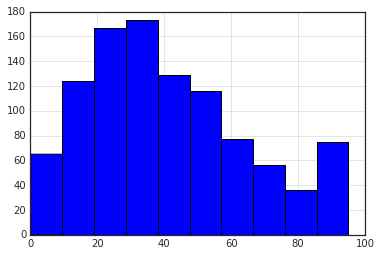

In [5]:
patient_affinities.max().hist()

In [7]:
# all > 30
# all < 2
# all within 3 PHBRs

In [61]:
excluded_mutations = []

In [62]:
excluded_mutations.extend(patient_affinities.min()[patient_affinities.min() > 30].index)

In [63]:
excluded_mutations.extend(patient_affinities.max()[patient_affinities.max() < 5].index)

In [64]:
excluded_mutations.extend(patient_affinities.min()[patient_affinities.quantile(0.9) - patient_affinities.quantile(0.1) < 20].index)

In [65]:
len(excluded_mutations)

922

In [66]:
included_mutations = [x for x in patient_affinities.columns if x not in excluded_mutations]
len(included_mutations)

201

In [67]:
patient_affinities.ix[:, included_mutations].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.variable.csv')
patient_mutations.ix[:, included_mutations].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.class_ii.variable.csv')

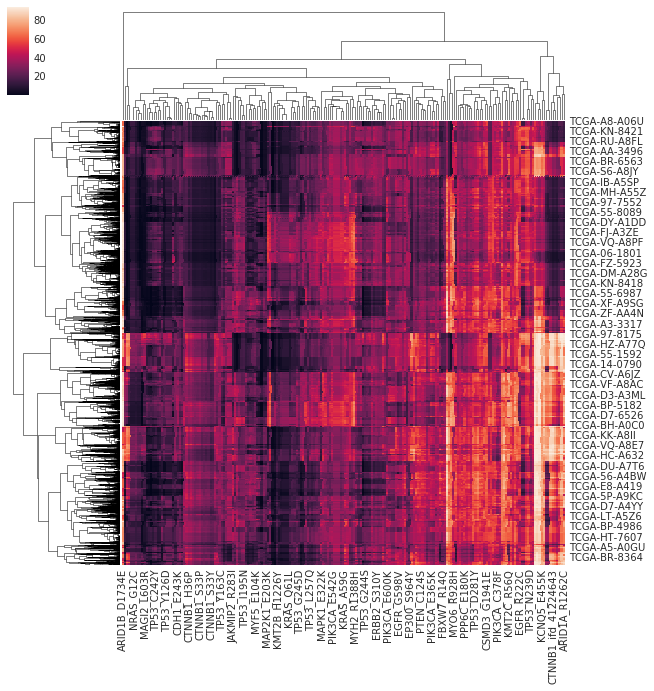

In [68]:
sns.clustermap(patient_affinities.ix[:, included_mutations])